In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn 

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/netflix-shows/netflix_titles.csv


In [2]:
my_data = pd.read_csv('../input/netflix-shows/netflix_titles.csv')
dt = my_data

In [3]:
dt.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [4]:
dt.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [5]:
dt.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [6]:
dt.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [7]:
dt["date_added"] = pd.to_datetime(dt['date_added'])
dt['year_added'] = dt['date_added'].dt.year

In [8]:
dt.dtypes

show_id                 object
type                    object
title                   object
director                object
cast                    object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
description             object
year_added             float64
dtype: object

In [9]:
dt.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021.0
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021.0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021.0
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021.0
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021.0


In [10]:
td = dt['type'].value_counts()
td

Movie      6131
TV Show    2676
Name: type, dtype: int64

<AxesSubplot:ylabel='type'>

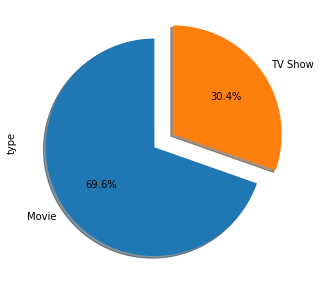

In [11]:
td.plot.pie(startangle = 90, shadow = True, explode = (0.07,0.14), autopct = '%1.1f%%',figsize = (5,5))

In [12]:
ct = dt['country'].value_counts().head()

Text(0.5, 1.0, '5 COUNTRYS ON NETFLIX')

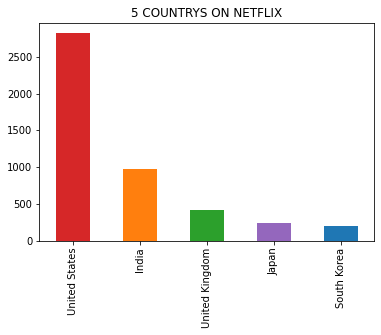

In [13]:
ax = plt.subplots()
bar_colors = ['tab:red', 'tab:orange', 'tab:green', 'tab:purple', 'tab:blue']
ct.plot.bar(color=bar_colors)
plt.title('5 COUNTRYS ON NETFLIX')


In [14]:
DirC = dt['director'].value_counts().head()
DirC

Rajiv Chilaka             19
Raúl Campos, Jan Suter    18
Marcus Raboy              16
Suhas Kadav               16
Jay Karas                 14
Name: director, dtype: int64

Text(0.5, 1.0, '5 Top directors')

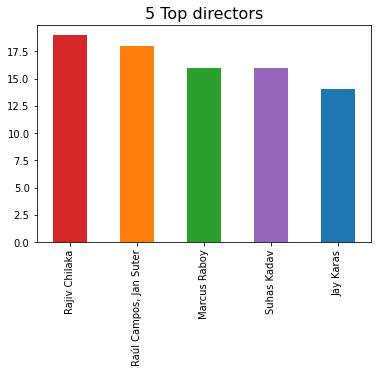

In [15]:

bar_colors = ['tab:red', 'tab:orange', 'tab:green', 'tab:purple', 'tab:blue']
DirC.plot.bar(color=bar_colors)
plt.title('5 Top directors', fontsize=16)


In [16]:
lc = dt['listed_in'].value_counts().head()

Text(0.5, 1.0, 'Most View')

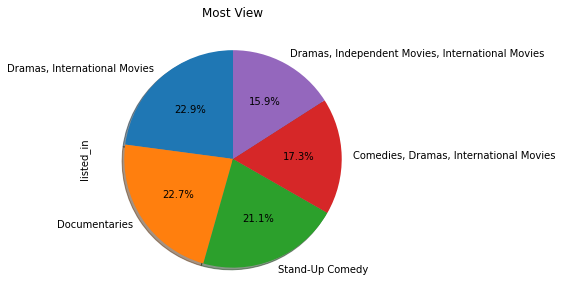

In [17]:
lc.plot.pie(startangle = 90, shadow = True, autopct = '%1.1f%%',figsize = (5,5))
plt.title('Most View')